# India News Extractor

**NLTK** Download if needed all the nltk repository databases from here: http://www.nltk.org/nltk_data/. Place these under the nltk_data directory in the structure required by the error message. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

## Reading in a URL
Let's read in the top news from the ET main page

In [3]:
import requests
from lxml.html import fromstring

In [5]:
url = 'https://economictimes.indiatimes.com/'
html = requests.get(url, timeout=10).text
doc = fromstring(html)
doc.cssselect(".active")

[<Element section at 0x112b634f8>,
 <Element h2 at 0x112b63548>,
 <Element a at 0x107f09728>,
 <Element li at 0x1138bd318>,
 <Element div at 0x1138d9c78>,
 <Element li at 0x1138d9cc8>,
 <Element li at 0x1138d9d18>,
 <Element li at 0x1138d9d68>,
 <Element li at 0x1138d9db8>,
 <Element li at 0x1138d9e08>,
 <Element li at 0x1138d9e58>,
 <Element li at 0x1138d9ea8>,
 <Element li at 0x1138d9ef8>,
 <Element li at 0x1138d9f48>,
 <Element li at 0x1138d9f98>,
 <Element li at 0x1138e2048>,
 <Element li at 0x1138e2098>,
 <Element a at 0x1138e20e8>,
 <Element a at 0x1138e2138>,
 <Element li at 0x1138e2188>,
 <Element li at 0x1138e21d8>,
 <Element li at 0x1138e2228>]

In [6]:
x = doc.cssselect(".active li")    #Try a, h2, section if you like
headlines = [x[j].text_content() for j in range(len(x))]
headlines = headlines[:20]   #Needed to exclude any other stuff that was not needed. 
print(headlines)

['Bidders have to provide funding source, cheques', 'Self-regulation for food cos, QSR chains soon', 'Telecom price war hurts call quality in urban areas', 'To fuel Mauritius, stay lifted on exports from ONGC', 'Disqualified directors get 3 months to put house in order', 'Yes Bank-EIB invest $400m in wind, solar projects', 'Complaints against private banks on rise: RBI report', 'Myntra to use kirana stores to sell merchandise', 'Coal demand to grow 4% a year till 2022', 'Create pool to save grid from dip in green power: CEA', 'Star India is planning to telecast IPL in six languages', "Airtel deposits 'interim penalty' of Rs 2.5 cr with UIDAI", "Indian-origin purchases ArcelorMittal's US steelworks", "Delhi firm beats Toyota in\xa0 'Prius' trademark duel", 'Faircent raises Series B from Muthoot Fincorp, Incofin', 'Saudi heralds biggest spending plans yet amid deficit', "LIC launches LIC's Jeevan Shiromani for HNIs", 'Car loans up 30%, average ticket sizes also growing', 'Saudis intercep

So, now we have all the ET news headlines for top news

## Sentiment Scoring

### Load in Harvard Inquirer Dictionary

In [7]:
## Here we will read in an entire dictionary from Harvard Inquirer
f = open('inqdict.txt')
HIDict = f.read()
HIDict = HIDict.splitlines()
HIDict = HIDict[1:]
print(HIDict[:5])
print(len(HIDict))

#Extract all the lines that contain the Pos tag
poswords = [j for j in HIDict if "Pos" in j]  #using a list comprehension
poswords = [j.split()[0] for j in poswords]
poswords = [j.split("#")[0] for j in poswords]
poswords = unique(poswords)
poswords = [j.lower() for j in poswords]
print(poswords[:20])
print(len(poswords))

#Extract all the lines that contain the Neg tag
negwords = [j for j in HIDict if "Neg" in j]  #using a list comprehension
negwords = [j.split()[0] for j in negwords]
negwords = [j.split("#")[0] for j in negwords]
negwords = unique(negwords)
negwords = [j.lower() for j in negwords]
print(negwords[:20])
print(len(negwords))

['A H4Lvd DET ART  | article: Indefinite singular article--some or any one', 'ABANDON H4Lvd Neg Ngtv Weak Fail IAV AFFLOSS AFFTOT SUPV  |', 'ABANDONMENT H4 Neg Weak Fail Noun  |', 'ABATE H4Lvd Neg Psv Decr IAV TRANS SUPV  |', 'ABATEMENT Lvd Noun  ']
11895
['abide', 'able', 'abound', 'absolve', 'absorbent', 'absorption', 'abundance', 'abundant', 'accede', 'accentuate', 'accept', 'acceptable', 'acceptance', 'accessible', 'accession', 'acclaim', 'acclamation', 'accolade', 'accommodate', 'accommodation']
1646
['abandon', 'abandonment', 'abate', 'abdicate', 'abhor', 'abject', 'abnormal', 'abolish', 'abominable', 'abrasive', 'abrupt', 'abscond', 'absence', 'absent', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'abuse', 'abyss']
2120


### Create Sentiment Scoring Function

In [8]:
def textSentiment(text,poswords,negwords):   
    text.lower(); print(text)
    text = text.split(' ')
    posmatches = set(text).intersection(set(poswords)); print(posmatches)
    negmatches = set(text).intersection(set(negwords)); print(negmatches)
    return [len(posmatches),len(negmatches)]

In [9]:
for h in headlines:
    s = textSentiment(h,poswords,negwords)
    print(s)

Bidders have to provide funding source, cheques
{'provide', 'have'}
set()
[2, 0]
Self-regulation for food cos, QSR chains soon
set()
set()
[0, 0]
Telecom price war hurts call quality in urban areas
{'quality', 'call'}
{'war'}
[2, 1]
To fuel Mauritius, stay lifted on exports from ONGC
set()
set()
[0, 0]
Disqualified directors get 3 months to put house in order
{'order'}
{'order', 'get'}
[1, 2]
Yes Bank-EIB invest $400m in wind, solar projects
set()
set()
[0, 0]
Complaints against private banks on rise: RBI report
set()
{'against'}
[0, 1]
Myntra to use kirana stores to sell merchandise
set()
set()
[0, 0]
Coal demand to grow 4% a year till 2022
set()
set()
[0, 0]
Create pool to save grid from dip in green power: CEA
{'save'}
set()
[1, 0]
Star India is planning to telecast IPL in six languages
set()
set()
[0, 0]
Airtel deposits 'interim penalty' of Rs 2.5 cr with UIDAI
set()
set()
[0, 0]
Indian-origin purchases ArcelorMittal's US steelworks
set()
set()
[0, 0]
Delhi firm beats Toyota in  'P

### Remove punctuation from headlines

In [10]:
import string
def removePuncStr(s):
    for c in string.punctuation:
        s = s.replace(c," ")
    return s

def removePunc(text_array):
    return [removePuncStr(h) for h in text_array]

In [11]:
headlines = removePunc(headlines)
headlines

['Bidders have to provide funding source  cheques',
 'Self regulation for food cos  QSR chains soon',
 'Telecom price war hurts call quality in urban areas',
 'To fuel Mauritius  stay lifted on exports from ONGC',
 'Disqualified directors get 3 months to put house in order',
 'Yes Bank EIB invest  400m in wind  solar projects',
 'Complaints against private banks on rise  RBI report',
 'Myntra to use kirana stores to sell merchandise',
 'Coal demand to grow 4  a year till 2022',
 'Create pool to save grid from dip in green power  CEA',
 'Star India is planning to telecast IPL in six languages',
 'Airtel deposits  interim penalty  of Rs 2 5 cr with UIDAI',
 'Indian origin purchases ArcelorMittal s US steelworks',
 'Delhi firm beats Toyota in\xa0  Prius  trademark duel',
 'Faircent raises Series B from Muthoot Fincorp  Incofin',
 'Saudi heralds biggest spending plans yet amid deficit',
 'LIC launches LIC s Jeevan Shiromani for HNIs',
 'Car loans up 30   average ticket sizes also growing',

### Remove numbers

In [12]:
def removeNumbersStr(s):
    for c in range(10):
        n = str(c)
        s = s.replace(n," ")
    return s

def removeNumbers(text_array):
    return [removeNumbersStr(h) for h in text_array]

In [13]:
headlines = removeNumbers(headlines)
headlines

['Bidders have to provide funding source  cheques',
 'Self regulation for food cos  QSR chains soon',
 'Telecom price war hurts call quality in urban areas',
 'To fuel Mauritius  stay lifted on exports from ONGC',
 'Disqualified directors get   months to put house in order',
 'Yes Bank EIB invest     m in wind  solar projects',
 'Complaints against private banks on rise  RBI report',
 'Myntra to use kirana stores to sell merchandise',
 'Coal demand to grow    a year till     ',
 'Create pool to save grid from dip in green power  CEA',
 'Star India is planning to telecast IPL in six languages',
 'Airtel deposits  interim penalty  of Rs     cr with UIDAI',
 'Indian origin purchases ArcelorMittal s US steelworks',
 'Delhi firm beats Toyota in\xa0  Prius  trademark duel',
 'Faircent raises Series B from Muthoot Fincorp  Incofin',
 'Saudi heralds biggest spending plans yet amid deficit',
 'LIC launches LIC s Jeevan Shiromani for HNIs',
 'Car loans up      average ticket sizes also growing',

### Stemming

https://pythonprogramming.net/stemming-nltk-tutorial/

In [14]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def stemText(text_array):
    stemmed_text = []
    for h in text_array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            h2 = h2 + ' ' + PorterStemmer().stem(w)
        stemmed_text.append(h2)
    return stemmed_text

In [ ]:
stemmed_headlines = stemText(headlines)
stemmed_headlines

### Remove Stopwords

Reference: https://pythonprogramming.net/stop-words-nltk-tutorial/

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def stopText(text_array):
    stop_words = set(stopwords.words('english'))
    stopped_text = []
    for h in text_array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            if w not in stop_words:
                h2 = h2 + ' ' + w
        stopped_text.append(h2)
    return stopped_text

In [ ]:
stopped_headlines = stopText(headlines)
stopped_headlines

### Write all docs to separate text files

In [17]:
def write2textfile(s,filename):
    text_file = open(filename, "w")
    text_file.write(s)
    text_file.close()

In [18]:
j = 0
for h in headlines:
    j = j + 1
    fname = "CTEXT/" + str(j) + ".ctxt"  #using "ctxt" to denote a corpus related file
    write2textfile(h,fname)

## Create a Corpus

In [19]:
#Read in the corpus
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'CTEXT/'
ctext = PlaintextCorpusReader(corpus_root, '.*')

In [20]:
ctext

<PlaintextCorpusReader in '/Users/srdas/GoogleDrive/Teaching/ISB/2018/IDTF-FinTech/Session7_TextMining_RegTech/CTEXT'>

In [21]:
ctext.fileids()

['1.ctxt',
 '10.ctxt',
 '11.ctxt',
 '12.ctxt',
 '13.ctxt',
 '14.ctxt',
 '15.ctxt',
 '16.ctxt',
 '17.ctxt',
 '18.ctxt',
 '19.ctxt',
 '2.ctxt',
 '20.ctxt',
 '3.ctxt',
 '4.ctxt',
 '5.ctxt',
 '6.ctxt',
 '7.ctxt',
 '8.ctxt',
 '9.ctxt']

In [22]:
ctext.words('1.ctxt')

['What', 's', 'up', 'WhatsApp', 'Google', 's', ...]

In [23]:
ctext.words('2.ctxt')

['Apple', 'increases', 'prices', 'of', 'iPhones', 'ex', ...]

## Term Document Matrix

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

docs = headlines
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
tdm = df.T
print(tdm.info())
print(tdm)

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, aadhaar to yet
Data columns (total 20 columns):
0     142 non-null int64
1     142 non-null int64
2     142 non-null int64
3     142 non-null int64
4     142 non-null int64
5     142 non-null int64
6     142 non-null int64
7     142 non-null int64
8     142 non-null int64
9     142 non-null int64
10    142 non-null int64
11    142 non-null int64
12    142 non-null int64
13    142 non-null int64
14    142 non-null int64
15    142 non-null int64
16    142 non-null int64
17    142 non-null int64
18    142 non-null int64
19    142 non-null int64
dtypes: int64(20)
memory usage: 23.3+ KB
None
            0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  \
aadhaar      0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
adani        0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
after        0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
aircel       0   0   0   0   0   0  

## TfIdf 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf = TfidfVectorizer(headlines)

In [27]:
tfs = tfidf.fit_transform(headlines)

In [28]:
tfs

<20x142 sparse matrix of type '<class 'numpy.float64'>'
	with 165 stored elements in Compressed Sparse Row format>

In [29]:
tdm_mat = tfs.toarray().T
print(tdm_mat.shape)
tdm_mat

(142, 20)


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.31988467,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.338985  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
tdm_mat[1][14]   #Check for corresponding element in the TDM vs TFIDF matrix

0.0

## WordClouds

In [31]:
text = ''
for h in headlines:
    text = text + ' ' + h
print(text)

 What s up  WhatsApp  Google s beating plastic in India Apple increases prices of iPhones  ex SE  after duty hike India can grow at   pc for next    years  UN expert Adani drops contractor for Australian coal mine Power outage leads to partial shutdown of Atlanta airport Songs pk returns  music industry expresses concern Warburg close to buying     stake in CAMS New plan to fast track Essar Steel resolution Airtel likely to face penalty for misusing Aadhaar details Pinera recaptures Chile presidency with resounding win Maruti Suzuki puts Indian market in top gear Chinese E SUV cheaper than Tesla Model X Bain Capital takes      mn bridge loan to fund Axis deal India now eyes WTO s next mini ministerial Women directors at top firms paid     less than men Logistics companies to deliver high paying jobs Maxis is not ready to give up on Aircel  yet Indiabulls  Mandarin Oriental team up for London project Promoters to put Rs     cr more in Super Fight League Drug makers may face sharper scru

(-0.5, 399.5, 199.5, -0.5)

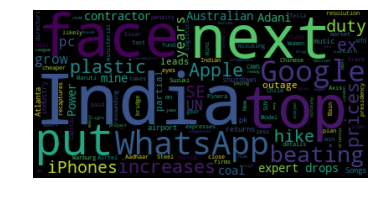

In [33]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)

#Use pyplot from matplotlib
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

(-0.5, 399.5, 199.5, -0.5)

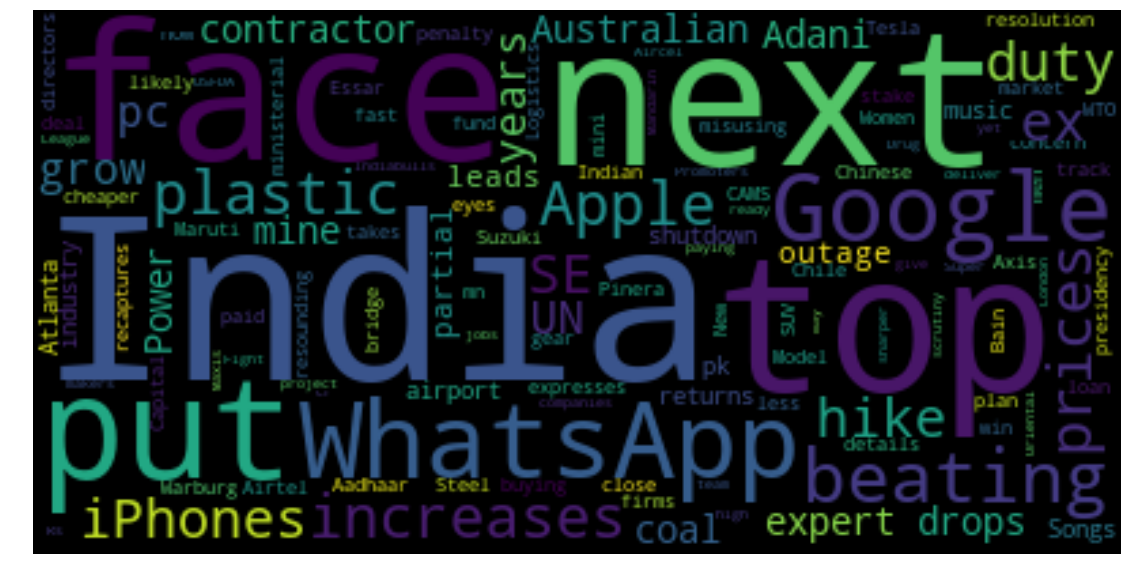

In [34]:
figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

# =========================
# Big Data: Reuters News Corpus

https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/reuters.zip

The Reuters-21578 benchmark corpus, ApteMod 

id: reuters; size: 6378691; author: ; copyright: ; license: The copyright for the text of newswire articles and Reuters annotations in the Reuters-21578 collection resides with Reuters Ltd. Reuters Ltd. and Carnegie Group, Inc. have agreed to allow the free distribution of this data *for research purposes only*. If you publish results based on this data set, please acknowledge its use, refer to the data set by the name 'Reuters-21578, Distribution 1.0', and inform your readers of the current location of the data set.;

https://pynlp.wordpress.com/2013/12/10/unit-5-part-ii-working-with-files-ii-the-plain-text-corpus-reader-of-nltk/

In [14]:
#Read in the corpus
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'reuters/training/'
ctext = PlaintextCorpusReader(corpus_root, '.*')

In [15]:
#How many docs, paragraphs, sentences, words, characters? 
print(len(ctext.fileids()))
print(len(ctext.paras()))
print(len(ctext.sents()))
print(len(ctext.words()))
print(len(ctext.raw()))

7769


LookupError: 
**********************************************************************
  Resource 'tokenizers/punkt/PY3/english.pickle' not found.
  Please use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - '/Users/srdas/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************

In [5]:
#Convert corpus to text array with a full sentence for each one
def merge_arrays(word_lists):
    wordlist = []
    for wl in word_lists:
        wordlist = wordlist + wl
    doc = ' '.join(wordlist)
    return doc

In [6]:
#Run this through the corpus to get a word array for each doc
text_array = []
for p in ctext.paras():
    doc = merge_arrays(p)
    text_array.append(doc)

In [7]:
#Show the array sample
print(len(text_array))

8471


In [13]:
#Clean up the docs using the previous functions
news = text_array
news = removePunc(news)
news = removeNumbers(news)
news = stopText(news)
#news = stemText(news)
news = [j.lower() for j in news]
news[:10]

[' bahia cocoa review showers continued throughout week bahia cocoa zone alleviating drought since early january improving prospects coming temporao although normal humidity levels restored comissaria smith said weekly review the dry period means temporao late year arrivals week ended february bags kilos making cumulative total season mln stage last year again seems cocoa delivered earlier consignment included arrivals figures comissaria smith said still doubt much old crop cocoa still available harvesting practically come end with total bahia crop estimates around mln bags sales standing almost mln hundred thousand bags still hands farmers middlemen exporters processors there doubts much cocoa would fit export shippers experiencing dificulties obtaining bahia superior certificates in view lower quality recent weeks farmers sold good part cocoa held consignment comissaria smith said spot bean prices rose cruzados per arroba kilos bean shippers reluctant offer nearby shipment limited sa

In [14]:
#Make it into a TFIDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(text_array)
tfs = tfidf.fit_transform(text_array)
tdm_mat = tfs.toarray().T
print(tdm_mat.shape)

(26283, 8471)


In [15]:
#Create plain TDM
from sklearn.feature_extraction.text import CountVectorizer

docs = news
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
tdm = df.T
tdm.shape

(24670, 8471)

In [18]:
tdm.iloc[2000:2050,0:50]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
bathurst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
batm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battered,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
batteries,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battering,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battlefield,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
battleships,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Topic Modeling using LDA

This is a nice article that has most of what is needed: 
https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

In [99]:
#Clean and process news documents into shape for LDA
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in news]

In [103]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
size(doc_term_matrix)

8471

In [104]:
#RUN THE MODEL
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [105]:
#Results
print(ldamodel.print_topics(num_topics=3, num_words=10))

[(0, '0.030*"said" + 0.015*"pct" + 0.012*"u" + 0.010*"year" + 0.010*"billion" + 0.009*"bank" + 0.009*"mln" + 0.007*"market" + 0.007*"trade" + 0.007*"would" + 0.006*"price" + 0.006*"rate" + 0.005*"tonne" + 0.005*"last" + 0.005*"oil" + 0.005*"export" + 0.005*"dlrs" + 0.004*"january" + 0.004*"february" + 0.004*"official" + 0.004*"month" + 0.004*"japan" + 0.004*"dollar" + 0.004*"government" + 0.004*"rise" + 0.004*"week" + 0.003*"rose" + 0.003*"new" + 0.003*"country" + 0.003*"foreign" + 0.003*"import" + 0.003*"two" + 0.003*"production" + 0.003*"one" + 0.003*"also" + 0.003*"mark" + 0.003*"state" + 0.003*"exchange" + 0.003*"currency" + 0.003*"agreement" + 0.002*"stg" + 0.002*"told" + 0.002*"current" + 0.002*"money" + 0.002*"say" + 0.002*"world" + 0.002*"could" + 0.002*"reserve" + 0.002*"cut" + 0.002*"level"'), (1, '0.040*"said" + 0.019*"lt" + 0.018*"company" + 0.016*"share" + 0.016*"dlrs" + 0.010*"pct" + 0.010*"mln" + 0.009*"inc" + 0.008*"corp" + 0.007*"stock" + 0.006*"group" + 0.005*"offer" 

## Word2Vec

https://en.wikipedia.org/wiki/Word2vec

https://rare-technologies.com/word2vec-tutorial/

https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [32]:
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [47]:
#Clean up the docs using the previous functions
news = text_array
news = removePunc(news)
news = removeNumbers(news)
news = stopText(news)
news = stemText(news)
news = [j.lower() for j in news]

[' bahia cocoa review shower continu throughout week bahia cocoa zone allevi drought sinc earli januari improv prospect come temporao although normal humid level restor comissaria smith said weekli review the dri period mean temporao late year arriv week end februari bag kilo make cumul total season mln stage last year again seem cocoa deliv earlier consign includ arriv figur comissaria smith said still doubt much old crop cocoa still avail harvest practic come end with total bahia crop estim around mln bag sale stand almost mln hundr thousand bag still hand farmer middlemen export processor there doubt much cocoa would fit export shipper experienc dificulti obtain bahia superior certif in view lower qualiti recent week farmer sold good part cocoa held consign comissaria smith said spot bean price rose cruzado per arroba kilo bean shipper reluct offer nearbi shipment limit sale book march shipment dlr per tonn port name new crop sale also light open port june juli go dlr dlr new york j

In [49]:
print(len(news))
news[:3]

8471


[' bahia cocoa review shower continu throughout week bahia cocoa zone allevi drought sinc earli januari improv prospect come temporao although normal humid level restor comissaria smith said weekli review the dri period mean temporao late year arriv week end februari bag kilo make cumul total season mln stage last year again seem cocoa deliv earlier consign includ arriv figur comissaria smith said still doubt much old crop cocoa still avail harvest practic come end with total bahia crop estim around mln bag sale stand almost mln hundr thousand bag still hand farmer middlemen export processor there doubt much cocoa would fit export shipper experienc dificulti obtain bahia superior certif in view lower qualiti recent week farmer sold good part cocoa held consign comissaria smith said spot bean price rose cruzado per arroba kilo bean shipper reluct offer nearbi shipment limit sale book march shipment dlr per tonn port name new crop sale also light open port june juli go dlr dlr new york j

In [56]:
#Tokenize each document
def textTokenize(text_array):
    textTokens = []
    for h in text_array:
        textTokens.append(h.split(' '))
    return textTokens

In [104]:
sentences = textTokenize(news)
print(len(sentences))
type(sentences)

8471


list

In [62]:
#Train the model on Word2Vec
model = gensim.models.Word2Vec(sentences, min_count=1)
type(model)

2017-12-18 17:48:55,012 : INFO : collecting all words and their counts
2017-12-18 17:48:55,013 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-12-18 17:48:55,138 : INFO : collected 18138 word types from a corpus of 680050 raw words and 8471 sentences
2017-12-18 17:48:55,139 : INFO : Loading a fresh vocabulary
2017-12-18 17:48:55,243 : INFO : min_count=1 retains 18138 unique words (100% of original 18138, drops 0)
2017-12-18 17:48:55,244 : INFO : min_count=1 leaves 680050 word corpus (100% of original 680050, drops 0)
2017-12-18 17:48:55,302 : INFO : deleting the raw counts dictionary of 18138 items
2017-12-18 17:48:55,303 : INFO : sample=0.001 downsamples 42 most-common words
2017-12-18 17:48:55,303 : INFO : downsampling leaves estimated 591001 word corpus (86.9% of prior 680050)
2017-12-18 17:48:55,304 : INFO : estimated required memory for 18138 words and 100 dimensions: 23579400 bytes
2017-12-18 17:48:55,363 : INFO : resetting layer weights
2017-12-18

gensim.models.word2vec.Word2Vec

In [80]:
model.wv['crop']

array([ 0.79135156,  0.35671407,  0.35085613, -0.24567731,  0.95344806,
        1.17170322, -1.42074347,  0.37113926,  0.82059693, -0.71829951,
        0.04754942,  0.58751041, -0.83245945,  0.62231928, -0.15970586,
       -0.9978075 ,  1.30556023, -1.25227356, -0.42119306,  1.11056674,
        0.55881631,  1.15474534,  1.56935656,  0.24736075,  0.30791155,
       -0.69611543,  0.12288048,  0.84222174, -0.93400127,  0.53336132,
       -0.06498455,  0.39820412,  0.23023126, -0.33838764,  0.50565124,
       -0.05974401, -0.82805616, -1.86824274, -1.44880676, -0.2625775 ,
        0.20595862, -0.70488942, -0.5351789 ,  1.17079639, -0.48884335,
       -1.55467784,  0.58875734,  0.08445959,  0.8835668 , -1.06391203,
       -1.45400023,  0.52865732,  0.56821859, -0.84315902,  0.58553612,
        0.30731636,  1.54699957,  0.78524107, -1.21234429,  0.89544731,
        0.10846109,  1.33153093,  1.78738689, -0.50615293, -0.43470129,
       -1.62304974,  0.61860341,  0.98117387, -0.30072004, -0.67

In [75]:
model.wv.most_similar('crop',topn=5)

[('harvest', 0.9423248171806335),
 ('winter', 0.9379401803016663),
 ('soybean', 0.8970884680747986),
 ('acreag', 0.8890024423599243),
 ('bumper', 0.8808109164237976)]

In [76]:
model.wv.most_similar('billion',topn=5)

[('guilder', 0.819899320602417),
 ('lire', 0.8134295344352722),
 ('mln', 0.7945210337638855),
 ('turnov', 0.79305499792099),
 ('mark', 0.7801977396011353)]

In [78]:
model.wv.similarity('sale','stock')

0.16914981679463575

In [88]:
model.wv.most_similar('bank')

[('governmnet', 0.7497141361236572),
 ('banker', 0.7446423768997192),
 ('central', 0.7396965026855469),
 ('england', 0.7363529801368713),
 ('save', 0.7236595153808594),
 ('bankhau', 0.7155678272247314),
 ('cpsa', 0.7081990838050842),
 ('commerci', 0.7006003260612488),
 ('bundesbank', 0.6948710680007935),
 ('sprinkler', 0.6948709487915039)]

In [102]:
model.wv.most_similar(positive=['mark', 'german'], negative=['england'], topn=1)

[('briskli', 0.7066383361816406)]

In [106]:
#Visualize the Word2Vec model
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# train model
model = Word2Vec(sentences, min_count=1)

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

2017-12-18 18:15:00,307 : INFO : collecting all words and their counts
2017-12-18 18:15:00,309 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-12-18 18:15:00,422 : INFO : collected 18138 word types from a corpus of 680050 raw words and 8471 sentences
2017-12-18 18:15:00,423 : INFO : Loading a fresh vocabulary
2017-12-18 18:15:00,466 : INFO : min_count=1 retains 18138 unique words (100% of original 18138, drops 0)
2017-12-18 18:15:00,467 : INFO : min_count=1 leaves 680050 word corpus (100% of original 680050, drops 0)
2017-12-18 18:15:00,524 : INFO : deleting the raw counts dictionary of 18138 items
2017-12-18 18:15:00,525 : INFO : sample=0.001 downsamples 42 most-common words
2017-12-18 18:15:00,525 : INFO : downsampling leaves estimated 591001 word corpus (86.9% of prior 680050)
2017-12-18 18:15:00,526 : INFO : estimated required memory for 18138 words and 100 dimensions: 23579400 bytes
2017-12-18 18:15:00,593 : INFO : resetting layer weights
2017-12-18

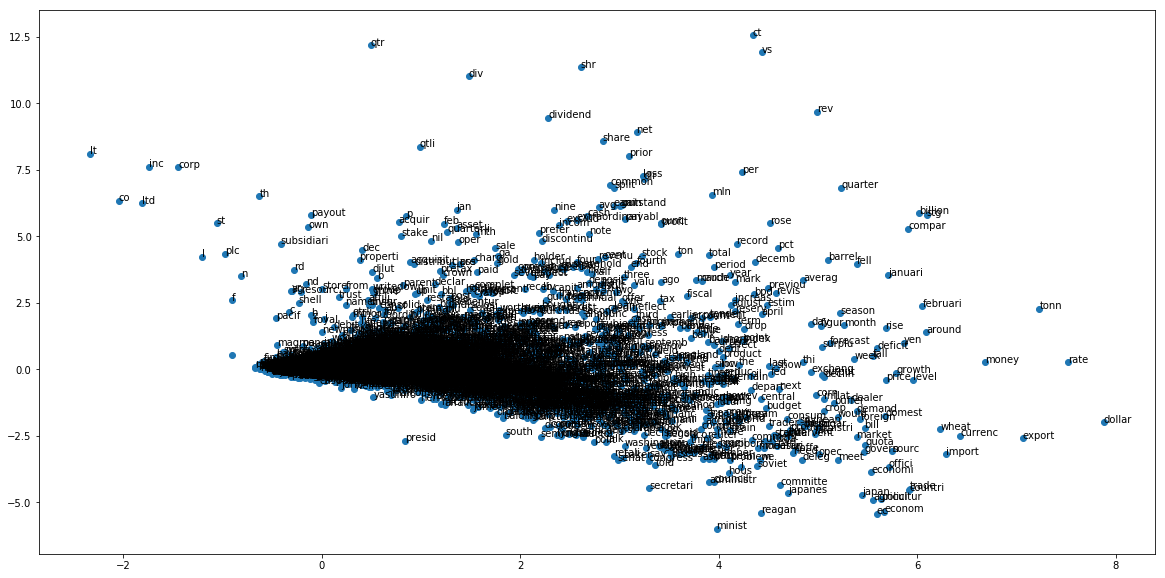

In [107]:
# create a scatter plot of the projection
figure(figsize=(20,10))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [109]:
model.wv.similarity('billion','compar')

0.7548530751406537

In [110]:
model.wv.similarity('billion','corp')

0.017985444774708464

## t-SNE representation

From: https://github.com/oreillymedia/t-SNE-tutorial

A popular dimensonality reduction algorithm: t-distributed stochastic neighbor embedding (t-SNE). Developed by Laurens van der Maaten and Geoffrey Hinton (see the original paper here: http://jmlr.csail.mit.edu/papers/volume9/vandermaaten08a/vandermaaten08a.pdf), this algorithm has been successfully applied to many real-world datasets. 

Let's adapt the code from this post: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

The nice thing is that the output model from Word2Vec feeds directly into this model! 

In [116]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        pyplot.scatter(x[i],y[i])
        pyplot.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    pyplot.show()

/Users/srdas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


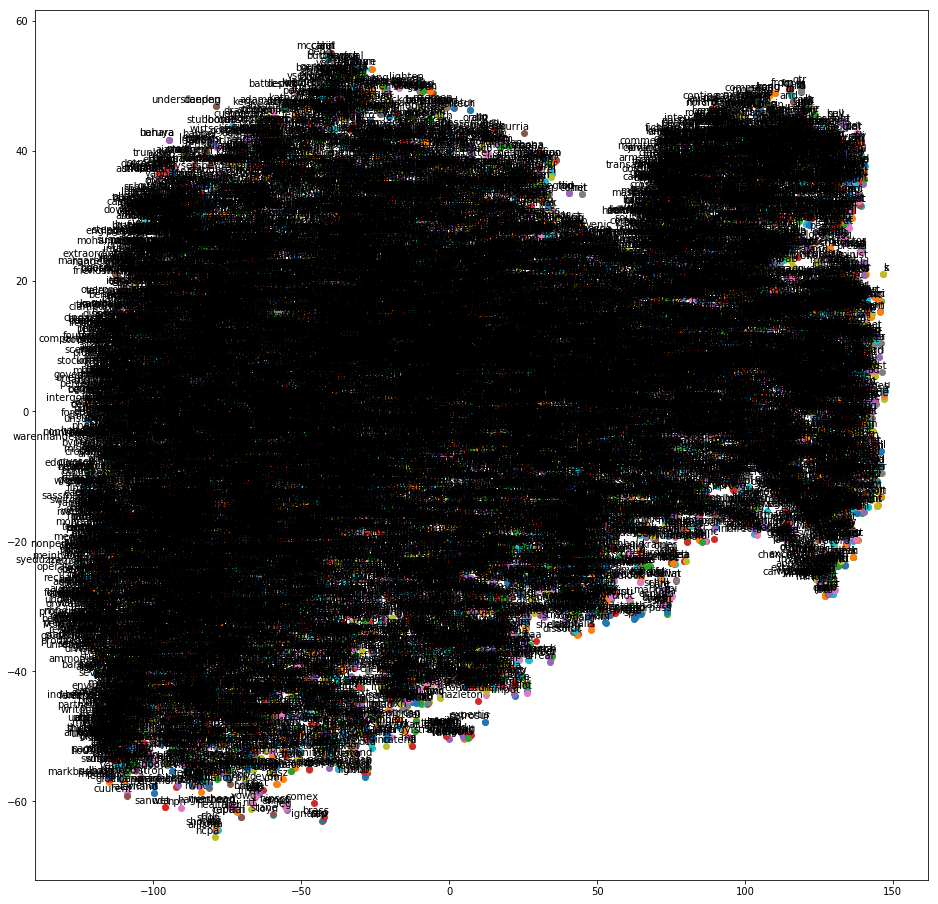

In [117]:
figure(figsize=(20,10))
tsne_plot(model)

In [ ]:
import nltk
nltk.download()